# INVESTMENT ASSIGNMENT

### By: M.Bharat 

Project Brief:

You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.
Business and Data Understanding
Spark Funds has two minor constraints for investments:

-> It wants to invest between 5 to 15 million USD per round of investment

-> It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

For your analysis, consider a country to be English speaking only if English is one of the official languages in that country


1. What is the strategy?

Spark Funds wants to invest where most other investors are investing. This pattern is often observed among early stage startup investors.


2. What is Spark Funds’ business objective?

The business objectives and goals of data analysis are pretty straightforward.

Business objective:

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the 'best' sectors and countries are the ones 'where most investors are investing'.

Goals of data analysis: Your goals are divided into three sub-goals:

Investment type analysis: 

Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy.

Country analysis:

Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well.

Sector analysis: 

Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight 'main sectors' provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

In [1]:
#All neccessary libraries to be imported
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Load the companies and rounds2 data into two dataframes,name them as companies and rounds2 respectively.

In [2]:
#Load companies csv file to companies dataframe
#View shape and head of the dataframe
companies = pd.read_csv("companies.csv", encoding = "ISO-8859-1")
print(companies.shape)
companies.head()

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
#Load rounds2 csv file to rounds2 dataframe
#View shape and head of the dataframe
rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
print(rounds2.shape)
rounds2.head()

(114949, 6)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


## Checkpoint 1 :  Data Cleaning 1

### Table 1.1

#### Without Data Cleaning

In [4]:
#Converting company_permalink and permalink columns to lowercase 
rounds2["company_permalink"] = rounds2["company_permalink"].str.lower()
companies["permalink"] = companies["permalink"].str.lower()

In [5]:
#Unique companies in rounds2 dataframe
print("Number of Unique companies present in rounds2 dataframe : {0}".format(len(rounds2.company_permalink.unique())))

Number of Unique companies present in rounds2 dataframe : 66370


In [6]:
#Unique companies in companies dataframe
print("Number of Unique companies present in companies dataframe : {0}".format(len(companies.permalink.unique())))

Number of Unique companies present in companies dataframe : 66368


In [7]:
#View which column can be used as the unique key for each company in companies dataframe
print(companies.shape)
companies.describe()

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66099,61191,27296,4,137,311,1092,5111,3978
top,/organization/amp-your-good,Roost,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


As we observe, __permalink__ column can be used as the unique key for each company in companies dataframe.

In [8]:
#To find are there any companies in the rounds2 dataframe which are not present in companies dataframe
print("Number of unique companies in rounds2 dataframe : {0}".format(len(rounds2.company_permalink.unique())))
print("Number of unique companies in companies dataframe : {0}".format(len(companies.permalink.unique())))

Number of unique companies in rounds2 dataframe : 66370
Number of unique companies in companies dataframe : 66368


There are companies in the rounds2 dataframe which are not present in companies dataframe.As we observe there are __2__ companies missing in companies dataframe.

In [9]:
#Merge both companies and rounds2 dataframe and name the dataframe as master_frame
master_frame = pd.merge(rounds2, companies , how='left',left_on='company_permalink',right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [10]:
#View masterframe shape and head
print(master_frame.shape)
master_frame.head()

(114949, 16)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [11]:
#Number of observations in master_frame 
print("{0} observations are present in master_frame".format(master_frame.shape[0]))

114949 observations are present in master_frame


## PERFORM DATA CLEANING

In [12]:
#As we observe there is cleaning to be done to the data
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [13]:
#As we observe there is cleaning to be done to the data
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/organization/ä°novatiff-reklam-ve-tanä±tä±m-h...,Ä°novatiff Reklam ve TanÄ±tÄ±m Hizmetleri Tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [14]:
#Clean data
#Data after cleaning 
rounds2['company_permalink'] = rounds2['company_permalink'].str.encode('utf_8').str.decode('ascii', 'ignore')
rounds2.tail()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN
114947,/organization/asys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0
114948,/organization/novatiff-reklam-ve-tantm-hizmetl...,/funding-round/af942869878d2cd788ef5189b435ebc4,grant,NaN,01-10-2013,14851.0


In [15]:
#Clean data
#Data after cleaning 
companies['permalink'] = companies['permalink'].str.encode('utf_8').str.decode('ascii', 'ignore')
companies['name'] = companies['name'].str.encode('utf_8').str.decode('ascii', 'ignore').str.lower()
companies.tail()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
66363,/organization/zznode-science-and-technology-co...,zznode science and technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/organization/zzzzapp-com,zzzzapp wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/organization/eron,eron,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/organization/asys-2,asys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014
66367,/organization/novatiff-reklam-ve-tantm-hizmetl...,novatiff reklam ve tantm hizmetleri tic,http://inovatiff.com,Consumer Goods|E-Commerce|Internet,operating,NaN,NaN,NaN,NaN,NaN


In [16]:
#Unique companies in rounds2 dataframe after cleanig
print("Number of Unique companies present in rounds2 dataframe : {0}".format(len(rounds2.company_permalink.unique())))

Number of Unique companies present in rounds2 dataframe : 66368


In [17]:
#Unique companies in companies dataframe after cleanig
print("Number of Unique companies present in companies dataframe : {0}".format(len(companies.permalink.unique())))

Number of Unique companies present in companies dataframe : 66368


In [18]:
#To find which column can be used as the unique key for each company in companies dataframe
print(companies.shape)
companies.describe()

(66368, 10)


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66034,61191,27296,4,137,311,1092,5111,3978
top,/organization/amp-your-good,shift,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


As we observe, __permalink__ column can be used as the unique key for each company in companies dataframe.

In [19]:
#Find are there any companies in the rounds2 dataframe which are not present in companies dataframe
print("Number of unique companies in rounds2 dataframe : {0}".format(len(rounds2.company_permalink.unique())))
print("Number of unique companies in companies dataframe : {0}".format(len(companies.permalink.unique())))

Number of unique companies in rounds2 dataframe : 66368
Number of unique companies in companies dataframe : 66368


As we observe, all companies in the rounds2 dataframe are present in companies dataframe.

In [20]:
#Merge both companies and rounds2 dataframe and name the dataframe as master_frame
master_frame = pd.merge(rounds2, companies , how='left',left_on="company_permalink",right_on='permalink')
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [21]:
#View master_frame shape and head
print(master_frame.shape)
master_frame.head()

(114949, 16)


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(the) one of them,inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [22]:
#Number of observations in master_frame 
print("{0} observations are present in master_frame".format(master_frame.shape[0]))

114949 observations are present in master_frame


In [23]:
#Information about all the columns
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
 6   permalink                114949 non-null  object 
 7   name                     114948 non-null  object 
 8   homepage_url             108815 non-null  object 
 9   category_list            111539 non-null  object 
 10  status                   114949 non-null  object 
 11  country_code             106271 non-null  object 
 12  state_code               104003 non-null  object 
 13  region                   104782 non-null  object 
 14  city

In [24]:
#Total number of null values in each column
master_frame.isnull().sum()

company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
dtype: int64

In [25]:
#Total percentage of null values in each column upto 2 precisions 
round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [26]:
#Since there are many null values in funding_round_code column ,we can drop it
master_frame=master_frame.drop('funding_round_code',axis=1)

In [27]:
#drop duplicate column permalink
master_frame=master_frame.drop('permalink',axis=1)

In [28]:
#drop homepage_url which is not neccessary for our analysis
master_frame=master_frame.drop('homepage_url',axis=1)

In [29]:
#drop founded_at which is not neccessary for our analysis
master_frame=master_frame.drop('founded_at',axis=1)

In [30]:
#Drop state_code,region and city columns which doesn't much contribute our analysis
master_frame=master_frame.drop('state_code',axis=1)
master_frame=master_frame.drop('region',axis=1)
master_frame=master_frame.drop('city',axis=1)

In [31]:
#Remove all the rows having null value in raised_amount_usd column
master_frame=master_frame[~(master_frame.raised_amount_usd.isnull())]

In [32]:
#Remove all the rows having 0 as raised_amount_usd 
master_frame=master_frame[~(master_frame.raised_amount_usd==0)]

In [33]:
#Impute all the rows in category_list which is has null values to Not_defined
master_frame.loc[pd.isnull(master_frame['category_list']),['category_list']]="Not_defined"

In [34]:
#Impute all the rows in country_code which is has null values to NA(Not available)
master_frame.loc[pd.isnull(master_frame['country_code']),['country_code']]="NA"

In [35]:
#View the data after cleaning
master_frame.head(20)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0,"(the) one of them,inc.",Apps|Games|Mobile,operating,NA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0,0-6.com,Curated Web,operating,CHN
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0,01games technology,Games,operating,HKG
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0,ondine biomedical inc.,Biotechnology,operating,CAN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,ondine biomedical inc.,Biotechnology,operating,CAN
9,/organization/0xdata,/funding-round/383a9bd2c04f7038bb543ccef5ba3eae,seed,22-05-2013,3000000.0,h2o.ai,Analytics,operating,USA
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,h2o.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,h2o.ai,Analytics,operating,USA


In [36]:
#Total percentage of null values in each columns after data cleaning
round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
dtype: float64

As we observe data cleaning is done successfully with 0% of null values in all the columns

In [37]:
#Total percentage of data lost by rows
print("Percentage of data lost : {0}%".format(round(100-(100*(len(master_frame.index)/114949)),2)))

Percentage of data lost : 17.75%


In [38]:
#shape of the dataframe
master_frame.shape

(94544, 9)

## Checkpoint 2: Funding Type Analysis 

### Table 2.1 

In [39]:
#To avoid scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [40]:
#Average funding amount of venture type
master_frame.pivot_table(values='raised_amount_usd',index='funding_round_type',aggfunc='mean').loc[['venture']]

,raised_amount_usd
funding_round_type,
venture,11755736.51


In [41]:
#Average funding amount of angel type
master_frame.pivot_table(values='raised_amount_usd',index='funding_round_type',aggfunc='mean').loc[['angel']]

,raised_amount_usd
funding_round_type,
angel,964848.86


In [42]:
#Average funding amount of seed type
master_frame.pivot_table(values='raised_amount_usd',index='funding_round_type',aggfunc='mean').loc[['seed']]

,raised_amount_usd
funding_round_type,
seed,722726.91


In [43]:
#Average funding amount of private equity type
master_frame.pivot_table(values='raised_amount_usd',index='funding_round_type',aggfunc='mean').loc[['private_equity']]

,raised_amount_usd
funding_round_type,
private_equity,73422367.36


In [44]:
#Count of all the funding round type
master_frame.funding_round_type.value_counts()

venture                  50199
seed                     23508
debt_financing            6656
angel                     4829
grant                     2122
private_equity            1933
undisclosed               1566
convertible_note          1423
equity_crowdfunding       1046
post_ipo_equity            628
product_crowdfunding       382
post_ipo_debt              152
non_equity_assistance       70
secondary_market            30
Name: funding_round_type, dtype: int64

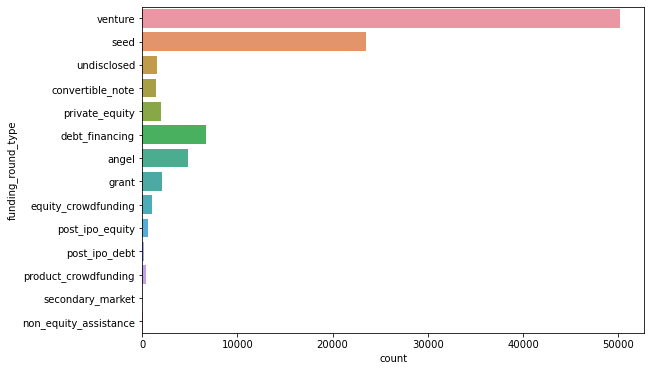

In [45]:
#Plot count of all the funding round type
plt.figure(figsize=[9,6])
sns.countplot(y="funding_round_type", data=master_frame)
plt.show()

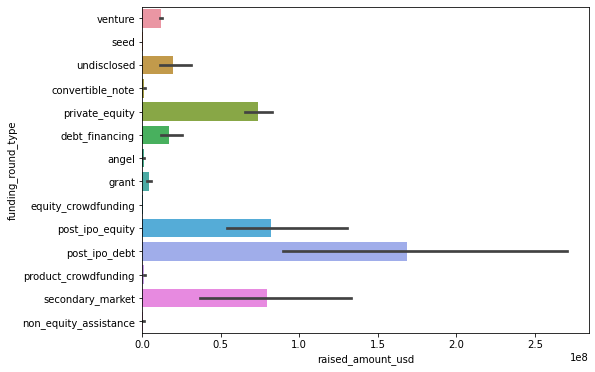

In [46]:
#View average of raised amount across all the funding type in barplot 
plt.figure(figsize=[8,6])
sns.barplot(y=master_frame.funding_round_type,x=master_frame.raised_amount_usd,orient="h")
plt.show()

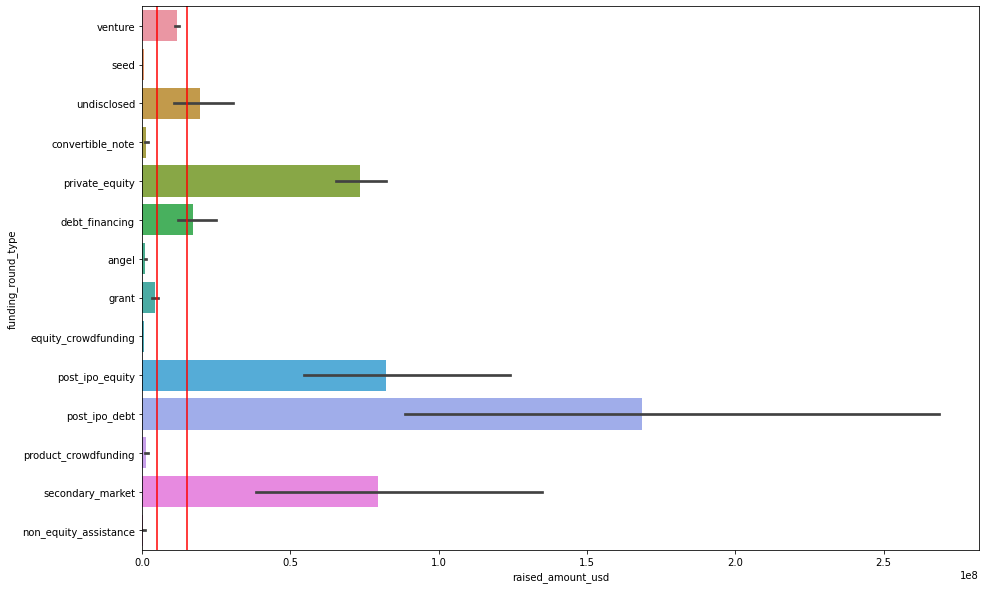

In [47]:
#Bar plot with mean of raised amount in usd between 5 to 15 million USD per with all funding type
plt.figure(figsize=[15,10])
sns.barplot(y=master_frame['funding_round_type'], x=master_frame['raised_amount_usd'])
plt.axvline(x=5000000,color='r')
plt.axvline(x=15000000,color='r')
plt.show()

#### Let's consider only 4 funding round types which is venture,angel,seed and private equity for our analysis

In [48]:
#Considering only 4 funding round types which is venture,angel,seed and private equity for our analysis
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture', 'angel', 'seed', 'private_equity' ])]

In [49]:
#Veiwing dataframe after considering only required funding round types
master_frame.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.00,:qounter,Application Platforms|Real Time|Social Network...,operating,USA
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(the) one of them,inc.",Apps|Games|Mobile,operating,NA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,Curated Web,operating,CHN
7,/organization/0ndine-biomedical-inc,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.00,ondine biomedical inc.,Biotechnology,operating,CAN


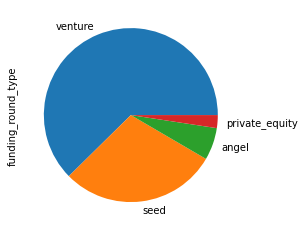

In [50]:
#Count of required funding round type
master_frame.funding_round_type.value_counts().plot.pie()
plt.show()

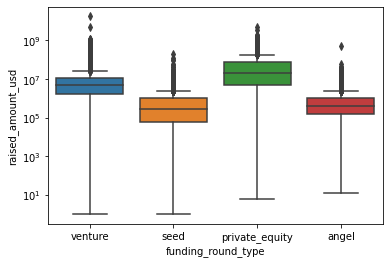

In [51]:
#Showing average of raised amount across all the funding type through boxplot to see outliers 
sns.boxplot(x=master_frame.funding_round_type,y=master_frame.raised_amount_usd)
plt.yscale('log')
plt.show()

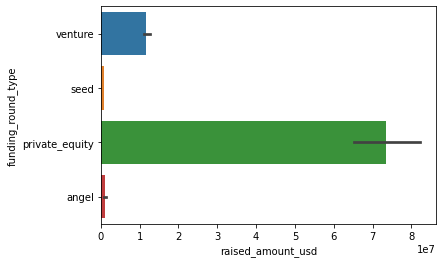

In [52]:
#Average of raised amount across all the funding type in barplot 
sns.barplot(y=master_frame.funding_round_type,x=master_frame.raised_amount_usd,orient="h")
plt.show()

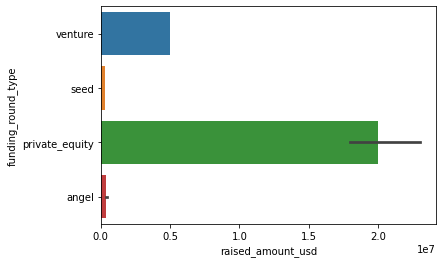

In [53]:
#Median of raised amount across all the funding type in barplot 
sns.barplot(y=master_frame.funding_round_type,x=master_frame.raised_amount_usd,orient="h",estimator=np.median)
plt.show()

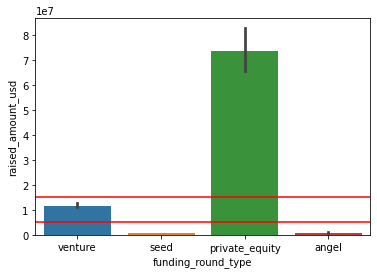

In [54]:
#Bar plot with mean raised amount in usd between 5 to 15 million USD per 
sns.barplot(x=master_frame['funding_round_type'], y=master_frame['raised_amount_usd'])
plt.axhline(y=5000000,color='r')
plt.axhline(y=15000000,color='r')
plt.show()

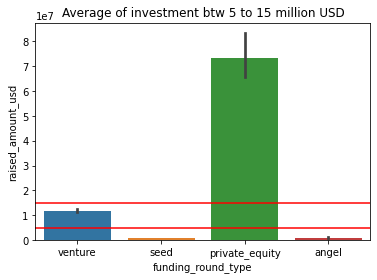

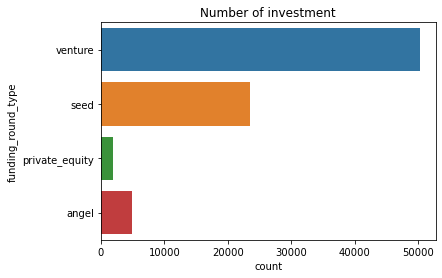

In [55]:
#Checkpoint 6- A plot showing the representative amount of investment in each funding type. This chart will make it clear that a certain funding type (FT) is best suited for Spark Funds.   
#This 2 graphs helps to find which investment type is the most suitable for spark funds 
plot1=master_frame
sns.barplot(x=master_frame['funding_round_type'], y=master_frame['raised_amount_usd'])
plt.axhline(y=5000000,color='r')
plt.axhline(y=15000000,color='r')
plt.title('Average of investment btw 5 to 15 million USD')
plt.show()
sns.countplot(y="funding_round_type", data=master_frame)
plt.title('Number of investment')
plt.show()

With the help of this 2 plot ,we can conclude that **Venture** investment type is the most suitable for Spark Fund can invest between 5 to 15 million USD per investment round.

## Checkpoint 3: Country Analysis

In [56]:
#Considering only venture investment type for our further analysis
master_frame=master_frame[master_frame['funding_round_type'].isin(['venture'])]

In [57]:
#Shape of dataframe
master_frame.shape

(50199, 9)

In [58]:
#View dataframe
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.00,"(the) one of them,inc.",Apps|Games|Mobile,operating,NA
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,ondine biomedical inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,h2o.ai,Analytics,operating,USA
...,...,...,...,...,...,...,...,...,...
114931,/organization/zyraz-technology,/funding-round/e949f077c943db197f20e43c2eb8d0e6,venture,09-10-2009,7991547.00,zyraz technology,Biotechnology,closed,MYS
114934,/organization/zyrra,/funding-round/7a0fa791c96c9c447ee54662395beab9,venture,18-10-2012,140500.00,zyrra,E-Commerce,operating,USA
114936,/organization/zystor,/funding-round/7ea37c0ff4132b084832039a9380d34e,venture,16-12-2004,8500000.00,zystor,Biotechnology,acquired,USA
114937,/organization/zytoprotec,/funding-round/0c43e717298296d2fb334fb236300f6e,venture,29-01-2013,2686600.00,zytoprotec,Biotechnology,operating,AUT


In [59]:
#View the top 10 countries with highest funding
master_frame.pivot_table(values='raised_amount_usd',index='country_code',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)[:10]

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
NA,25506108414.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00


In [60]:
#Creating a new dataframe top9 which is top 9 list of countires having highest funding excluding NA
top9 = master_frame[master_frame['country_code'].isin(['USA','CHN','GBR','IND','CAN','FRA','ISR','DEU','JPN'])]
top9.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.00,0-6.com,Curated Web,operating,CHN
8,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.00,ondine biomedical inc.,Biotechnology,operating,CAN
10,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.00,h2o.ai,Analytics,operating,USA
11,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.00,h2o.ai,Analytics,operating,USA


In [61]:
#Top 9 countires having highest funding
top9.pivot_table(values='raised_amount_usd',index='country_code',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)

,raised_amount_usd
country_code,
USA,422510842796.00
CHN,39835418773.00
GBR,20245627416.00
IND,14391858718.00
CAN,9583332317.00
FRA,7259536732.00
ISR,6907514579.00
DEU,6346959822.00
JPN,3363676611.00


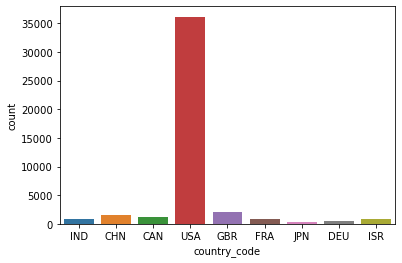

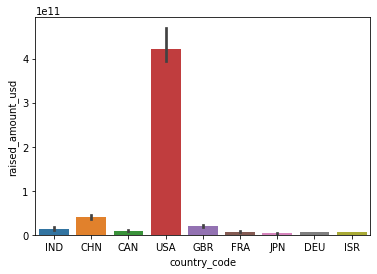

In [62]:
#Plot of top9 countires having highest funding
#Checkpoint 6- A plot showing the top 9 countries against the total amount of investments of funding type FT. This will make the top 3 countries (Country 1, Country 2, and Country 3) very clear.    
plot2=top9
sns.countplot(top9.country_code)
plt.show()
sns.barplot(x='country_code',y='raised_amount_usd',data=top9,estimator=np.sum)
plt.show()

For our analysis,considering countries to be English speaking only if English is one of the official languages in that country.

With refernce of https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language 

CHN- CHINA which is not having English has one of the official languages in the country.

***Top 3 English-Speaking Countries***

__1. USA- United States of America__

__2. GBR- United Kingdom(The Great Britain)__

__3. IND- India__

## Checkpoint 4: Sector Analysis 1 

In [63]:
#Considering only top3 highest funding for further analysis
top3=top9[top9['country_code'].isin(['USA','GBR','IND'])]

In [64]:
#To know the number of rows and columns
top3.shape

(38996, 9)

In [65]:
#Veiwing 20 records in category list from the dataframe 
top3.category_list[:20]

0                                                  Media
10                                             Analytics
11                                             Analytics
12                                             Analytics
22                      Apps|Cable|Distribution|Software
28                                             Education
34                                           Curated Web
38                                           Curated Web
39                                           Curated Web
41                                           Curated Web
44                                           Curated Web
59     Health Care|Health Care Information Technology...
61                                             Analytics
62                                              Software
73                              Biotechnology|Technology
74                                         Biotechnology
81                                   Enterprise Software
103                         Ser

As we observe the dataframe,in category_list column there is data cleaing to be performed.Where, we can consider the first string before the vertical bar as the primary sector for our analysis

For example in category list **Local Businesses|Restaurants** we take only **Local Businesses** as the primary sector

In [66]:
#Create new column primary sector which consists of the data from category list 
#Considering the first string before vertical bar
top3['primary_sector']=top3['category_list'].astype(str).apply(lambda x:x.split('|')[0])

In [67]:
#Dataframe after cleaing verify the data in category_list column
top3.primary_sector[:20]

0                    Media
10               Analytics
11               Analytics
12               Analytics
22                    Apps
28               Education
34             Curated Web
38             Curated Web
39             Curated Web
41             Curated Web
44             Curated Web
59             Health Care
61               Analytics
62                Software
73           Biotechnology
74           Biotechnology
81     Enterprise Software
103      Service Providers
108          Manufacturing
109          Manufacturing
Name: primary_sector, dtype: object

In category list **Apps|Games|Mobile** we took only **Apps** as the primary sector

In [68]:
#Loading the mapping.csv file into a mapping dataframe 
mapping = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [69]:
#Drop Blanks column which is not the main sector
mapping=mapping.drop('Blanks',axis=1)

In [70]:
#Performed to get all main sectors
mapping=pd.melt(mapping,id_vars=['category_list'])
mapping.head()

,category_list,variable,value
0,NaN,Automotive & Sports,0
1,3D,Automotive & Sports,0
2,3D Printing,Automotive & Sports,0
3,3D Technology,Automotive & Sports,0
4,Accounting,Automotive & Sports,0


In [71]:
#To get main sector dropping unneccessary rows 
mapping=mapping[mapping.value==1]
mapping.head()

,category_list,variable,value
8,Adventure Travel,Automotive & Sports,1
14,Aerospace,Automotive & Sports,1
45,Auto,Automotive & Sports,1
46,Automated Kiosk,Automotive & Sports,1
47,Automotive,Automotive & Sports,1


In [72]:
#Droping value column which is not neccessary for our analysis 
mapping=mapping.drop('value',axis=1)

After going through the dataset,it is found that "na" is missplet as "0".So,it has to be cleaned

In [73]:
#To know the all information of the dataframe
mapping.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 687 entries, 8 to 5479
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   category_list  687 non-null    object
 1   variable       687 non-null    object
dtypes: object(2)
memory usage: 16.1+ KB


In [74]:
#Converting category_list and variable column to string datatype
#Replacing "0" with "na"
mapping['category_list']=mapping.category_list.astype(str)
mapping['variable']=mapping.variable.astype(str)
mapping['category_list']=mapping.category_list.apply(lambda x:"na".join(i for i in x.split("0")))

In [75]:
#Rename columns variable to main sector and category list to primary sector
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)
mapping.head()   

,primary_sector,main_sector
8,Adventure Travel,Automotive & Sports
14,Aerospace,Automotive & Sports
45,Auto,Automotive & Sports
46,Automated Kiosk,Automotive & Sports
47,Automotive,Automotive & Sports


In [76]:
#Converting all the rows in the column to lower case
mapping['primary_sector']=mapping['primary_sector'].str.lower()
top3['primary_sector']=top3['primary_sector'].str.lower()

In [77]:
#Merge mapping and top3 dataframe considering only the category list which is present in both the dataframe
merged_df = pd.merge(top3,mapping,how='inner',on='primary_sector')
merged_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
3,/organization/90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,all def digital,Media,operating,USA,media,Entertainment


In [78]:
#Shape of the dataframe 
merged_df.shape

(38770, 11)

**The dataframe has now 2 additional columns which is primary sector and main sector**

**Thus,merged dataframe has each primary sector mapped to its main sector.** 

## Checkpoint 4: Sector Analysis 1 

### Table 5.1

In [79]:
#Considering only rows where investment is between 5-15 M USD
merged_df=merged_df[merged_df['raised_amount_usd']>=5000000]
merged_df=merged_df[merged_df['raised_amount_usd']<=15000000]
merged_df.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,Entertainment
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,all def digital,Media,operating,USA,media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.00,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment


In [80]:
#Creating dataframes for each countries
D1 = merged_df[merged_df['country_code'] == 'USA']
D2 = merged_df[merged_df['country_code'] == 'GBR']
D3 = merged_df[merged_df['country_code'] == 'IND']

In [81]:
#D1 is USA dataframe
#View shape and dataframe
print(D1.shape)
D1.head()

(12063, 11)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
4,/organization/all-def-digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.00,all def digital,Media,operating,USA,media,Entertainment
14,/organization/chefs-feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,26-02-2015,5000000.00,chefsfeed,Media|Mobile|Restaurants|Technology,operating,USA,media,Entertainment
20,/organization/huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,01-08-2006,5000000.00,the huffington post,Media|News|Publishing,acquired,USA,media,Entertainment
21,/organization/huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,01-09-2007,5000000.00,the huffington post,Media|News|Publishing,acquired,USA,media,Entertainment
25,/organization/matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,01-09-2007,10000000.00,matchmine,Media|News|Reviews and Recommendations,closed,USA,media,Entertainment


In [82]:
#D2 is GBR dataframe
#View shape and dataframe
print(D2.shape)
D2.head()

(621, 11)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
1,/organization/90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
2,/organization/90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.00,90min,Media|News|Publishing|Soccer|Sports,operating,GBR,media,Entertainment
91,/organization/aihit,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,07-10-2011,5500000.00,aihit,Analytics|Artificial Intelligence|Business Int...,acquired,GBR,analytics,"Social, Finance, Analytics, Advertising"
219,/organization/brandwatch,/funding-round/09f7932220728f0083982db2fced0518,venture,15-03-2012,6000000.00,brandwatch,Analytics|Social Media,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"
435,/organization/digital-shadows,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,11-02-2015,8000000.00,digital shadows,Analytics|Cyber Security|Financial Services|In...,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"


In [83]:
#D3 is IND dataframe
#View shape and dataframe
print(D3.shape)
D3.head()

(328, 11)


,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.00,#fame,Media,operating,IND,media,Entertainment
454,/organization/eka-software-solutions,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,01-01-2005,6000000.00,eka software solutions,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
455,/organization/eka-software-solutions,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,01-01-2009,10000000.00,eka software solutions,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
722,/organization/loginext-solutions,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,22-09-2015,10000000.00,loginext solutions,Analytics|Big Data Analytics|Data Visualizatio...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
740,/organization/manthan-systems,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,01-03-2007,5700000.00,manthan systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"


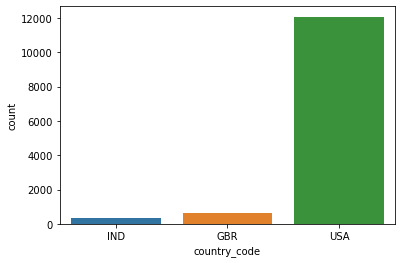

In [84]:
#Count of number of investments in each country
sns.countplot(merged_df['country_code'])
plt.show()

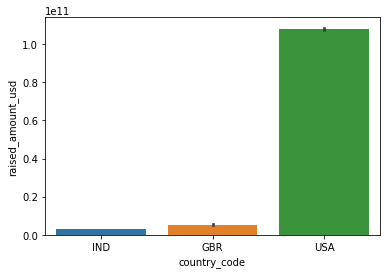

In [85]:
#Total amount of investment in each country
sns.barplot(x='country_code',y='raised_amount_usd',data=merged_df,estimator=np.sum)
plt.show()

#### USA - UNITED STATES OF AMERICA (D1)

In [86]:
#Total number of investments
print("Total number of investments : {0}".format(D1['raised_amount_usd'].count()))

Total number of investments : 12063


In [87]:
#Sum of investment 
print("Sum of investments : {0}".format(D1['raised_amount_usd'].sum()))

Sum of investments : 107757097294.0


In [88]:
#Top 3 sector names based on count of investments
D1.pivot_table(values='raised_amount_usd',index='main_sector',aggfunc='count').sort_values(by='raised_amount_usd',ascending=False)[:3]

,raised_amount_usd
main_sector,
Others,2950
"Social, Finance, Analytics, Advertising",2714
Cleantech / Semiconductors,2350


In [89]:
#Top company receiving the highest investment of which main sector is Others
D1[D1.main_sector=="Others"].pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)[:1]

,raised_amount_usd
company_permalink,
/organization/virtustream,64300000.00


In [90]:
#Top company receiving the highest investment of which main sector is Social, Finance, Analytics, Advertising
D1[D1.main_sector=="Social, Finance, Analytics, Advertising"].pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)[:1]

,raised_amount_usd
company_permalink,
/organization/shotspotter,67933006.00


#### GBR - UNITED KINGDOM(THE GREAT BRITAIN) (D2)

In [91]:
#Total number of investments
print("Total number of investments : {0}".format(D2['raised_amount_usd'].count()))

Total number of investments : 621


In [92]:
#Sum of investment 
print("Sum of investments : {0}".format(D2['raised_amount_usd'].sum()))

Sum of investments : 5379078691.0


In [93]:
#Top 3 sector names based on count of investments
D2.pivot_table(values='raised_amount_usd',index='main_sector',aggfunc='count').sort_values(by='raised_amount_usd',ascending=False)[:3]

,raised_amount_usd
main_sector,
Others,147
"Social, Finance, Analytics, Advertising",133
Cleantech / Semiconductors,130


In [94]:
#Top company receiving the highest investment of which main sector is Others
D2[D2.main_sector=="Others"].pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)[:1]

,raised_amount_usd
company_permalink,
/organization/electric-cloud,37000000.00


In [95]:
#Top company receiving the highest investment of which main sector is Social, Finance, Analytics, Advertising
D2[D2.main_sector=="Social, Finance, Analytics, Advertising"].pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)[:1]

,raised_amount_usd
company_permalink,
/organization/celltick-technologies,37500000.00


#### IND - INDIA (D3)

In [96]:
#Total number of investments
print("Total number of investments : {0}".format(D3['raised_amount_usd'].count()))

Total number of investments : 328


In [97]:
#Sum of investment 
print("Sum of investments : {0}".format(D3['raised_amount_usd'].sum()))

Sum of investments : 2949543602.0


In [98]:
#Top 3 sector names based on count of investments
D3.pivot_table(values='raised_amount_usd',index='main_sector',aggfunc='count').sort_values(by='raised_amount_usd',ascending=False)[:3]

,raised_amount_usd
main_sector,
Others,110
"Social, Finance, Analytics, Advertising",60
"News, Search and Messaging",52


In [99]:
#Top company receiving the highest investment of which main sector is Others
D3[D3.main_sector=="Others"].pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)[:1]

,raised_amount_usd
company_permalink,
/organization/firstcry-com,39000000.00


In [100]:
#Top company receiving the highest investment of which main sector is Social, Finance, Analytics, Advertising
D3[D3.main_sector=="Social, Finance, Analytics, Advertising"].pivot_table(values='raised_amount_usd',index='company_permalink',aggfunc='sum').sort_values(by='raised_amount_usd',ascending=False)[:1]

,raised_amount_usd
company_permalink,
/organization/manthan-systems,50700000.00


## Checkpoint 6: Plots 

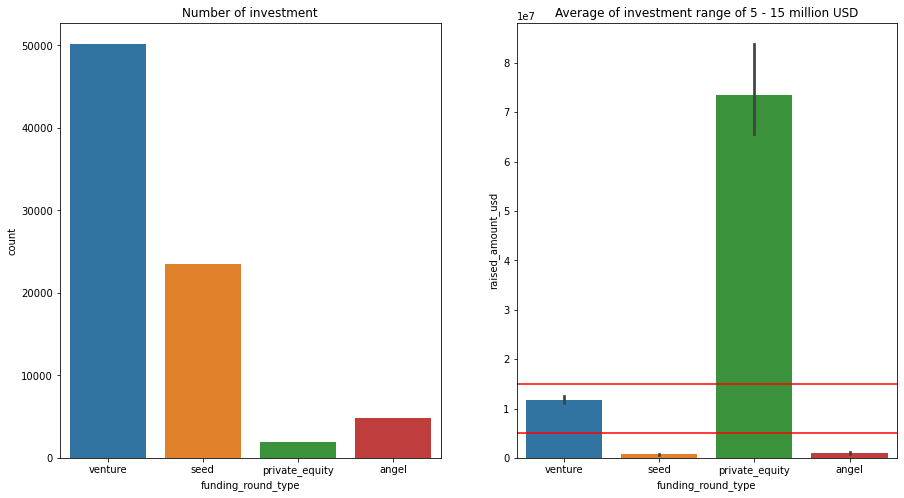

In [101]:
#A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   
plt.figure(figsize=[15,8])
plt.subplot(1,2,1)
sns.countplot(x="funding_round_type", data=plot1)
plt.title('Number of investment')
plt.subplot(1,2,2)
sns.barplot(x=plot1['funding_round_type'], y=plot1['raised_amount_usd'])
plt.axhline(y=5000000,color='r')
plt.axhline(y=15000000,color='r')
plt.title('Average of investment range of 5 - 15 million USD')
plt.show()

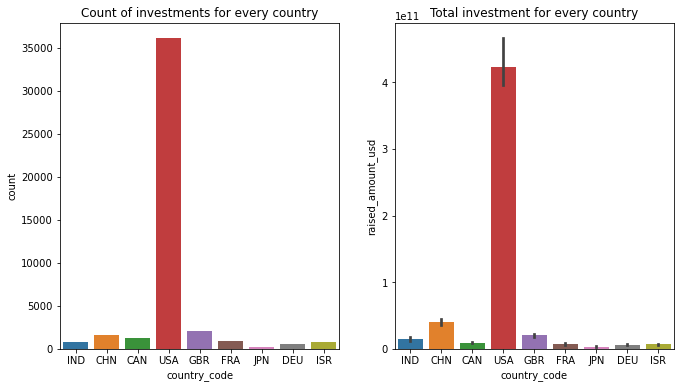

In [102]:
#A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.    
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
sns.countplot(plot2.country_code)
plt.title("Count of investments for every country")
plt.subplot(1, 2, 2)
sns.barplot(x="country_code", y="raised_amount_usd",data=plot2, estimator=sum)
plt.title("Total investment for every country")
plt.show()

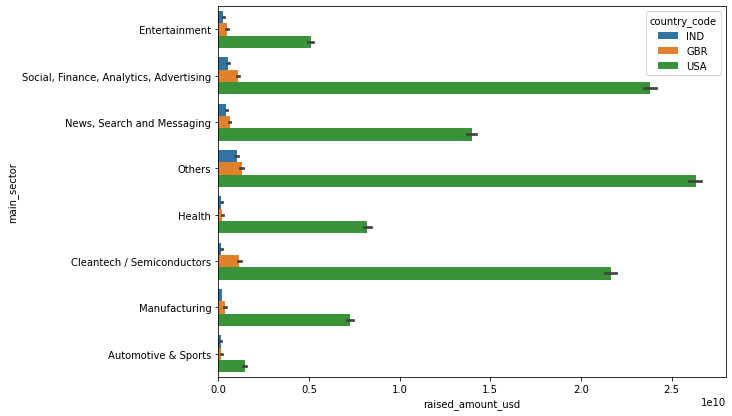

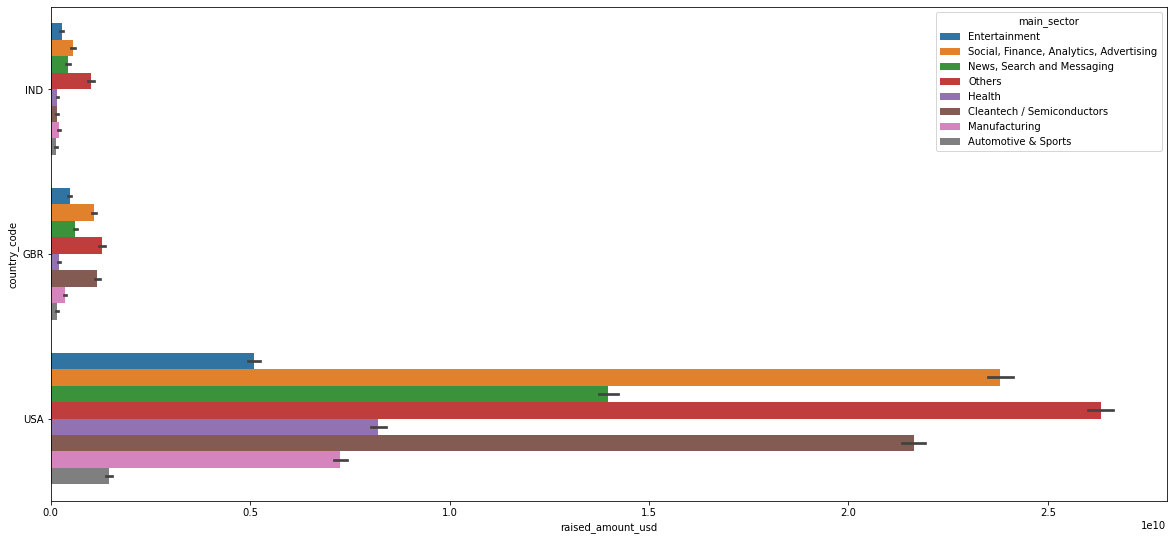

In [103]:
#plot showing the sum of investments for all the 8 sectors with respect to country and main sector in the top 3 English speaking countries.
plt.figure(figsize=(20, 15))
plt.subplot(2,2,1)
sns.barplot(y='main_sector', x='raised_amount_usd', hue="country_code", data=merged_df, estimator=np.sum)
plt.figure(figsize=(20, 20))
plt.subplot(2,1,2)
sns.barplot(y='country_code', x='raised_amount_usd', hue="main_sector", data=merged_df, estimator=np.sum)
plt.show()

In [104]:
#Consideing only top 3 main sector
D1=D1[D1.main_sector.isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
47,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.00,h2o.ai,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
57,/organization/accelerated-vision-group,/funding-round/efc17c623b56a27ee73dca0f0155def3,venture,21-05-2012,6000000.00,accelerated vision group,Analytics,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
59,/organization/accelops,/funding-round/c521b592ec7c69178447aa7242d90995,venture,01-10-2007,7000000.00,accelops,Analytics|Cloud Computing|Cloud Management|Net...,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
68,/organization/adaptive-insights,/funding-round/63bca9b5f18393be1880bafb909c0767,venture,22-01-2008,14000000.00,adaptive insights,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,analytics,"Social, Finance, Analytics, Advertising"
72,/organization/adaptive-insights,/funding-round/81a83b315bcf2e6e67592487249cbdb4,venture,01-03-2007,7500000.00,adaptive insights,Analytics|Business Analytics|Cloud Data Servic...,operating,USA,analytics,"Social, Finance, Analytics, Advertising"


In [105]:
#Consideing only top 3 main sector
D2=D2[D2.main_sector.isin(["Others","Social, Finance, Analytics, Advertising", "Cleantech / Semiconductors"])]
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
91,/organization/aihit,/funding-round/40cb08117155daba3aa7ad8b81b41068,venture,07-10-2011,5500000.00,aihit,Analytics|Artificial Intelligence|Business Int...,acquired,GBR,analytics,"Social, Finance, Analytics, Advertising"
219,/organization/brandwatch,/funding-round/09f7932220728f0083982db2fced0518,venture,15-03-2012,6000000.00,brandwatch,Analytics|Social Media,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"
435,/organization/digital-shadows,/funding-round/ca618cebbc7e8ada0921af25e9955166,venture,11-02-2015,8000000.00,digital shadows,Analytics|Cyber Security|Financial Services|In...,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"
443,/organization/duedil,/funding-round/05a71740dfbef5f6cb3d2689d8a7b573,venture,12-04-2013,5000000.00,duedil,Analytics|Transaction Processing,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"
644,/organization/intent-hq,/funding-round/6034decdb9ab2fe0d9d5e0372054712d,venture,01-05-2014,8009622.00,intent hq,Analytics|Interest Graph|Personalization|Software,operating,GBR,analytics,"Social, Finance, Analytics, Advertising"


In [106]:
#Consideing only top 3 main sector
D3=D3[D3.main_sector.isin(["Others","Social, Finance, Analytics, Advertising", "News, Search and Messaging"])]
D3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code,primary_sector,main_sector
454,/organization/eka-software-solutions,/funding-round/2bbd8112aa5429fdf92f13fcb4254f71,venture,01-01-2005,6000000.00,eka software solutions,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
455,/organization/eka-software-solutions,/funding-round/7b4c0d627c52b378a7c2b5c2edb10c26,venture,01-01-2009,10000000.00,eka software solutions,Analytics|Logistics|Software|Storage|Supply Ch...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
722,/organization/loginext-solutions,/funding-round/ae317438267472aa73cb1ac43e66a525,venture,22-09-2015,10000000.00,loginext solutions,Analytics|Big Data Analytics|Data Visualizatio...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
740,/organization/manthan-systems,/funding-round/34b5d3d2bbd104d20d1a62a27220739f,venture,01-03-2007,5700000.00,manthan systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"
741,/organization/manthan-systems,/funding-round/384bb8d8bc2a9a1df097f6a4c60e12dc,venture,09-12-2009,15000000.00,manthan systems,Analytics|Big Data Analytics|Business Intellig...,operating,IND,analytics,"Social, Finance, Analytics, Advertising"


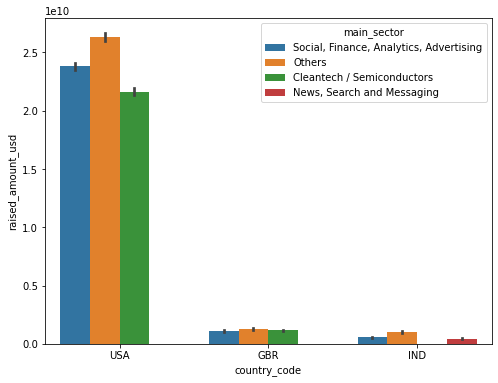

In [107]:
#A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3. 
plot3=pd.concat([D1,D2,D3])
plt.figure(figsize=[8,6])
sns.barplot(x='country_code', y='raised_amount_usd', hue="main_sector", data=plot3, estimator=np.sum)
plt.show()

# Assignment Completed

## By : M.Bharat